In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as gaussian
from math import pi, cos, sin

Average: 
[[1.99769378]
 [5.06983369]]
Cov:
[[4.8368161  3.91591442]
 [3.91591442 5.08151032]]


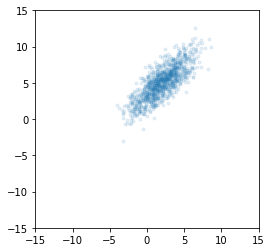

In [11]:
# generate many 2D (column) vectors
X = gaussian.rvs(0,1,(2,1000))
X[0,:] *= 3  # scale axis 0
f = +pi/4    # rotate by f
R = np.array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
V = R.dot(X)
V += np.array([[2],
               [5]]) # shift with a vector
# plot on square figure
plt.figure(figsize=(4,4)); a=15; plt.xlim(-a,a); plt.ylim(-a,a)
plt.plot(V[0,:],V[1,:], '.', alpha=0.1)

# sample covariance matrix
averages = np.mean(V, axis=1)
avg = averages.reshape(averages.size,1)
#avg = averages[:,np.newaxis] 
print ("Average: ")
print (avg)
print ("Cov:")
print (np.dot(V-avg, (V-avg).T) / (V[0,:].size-1))

<h1><font color="darkblue">Method of Least Squares</font></h1>

### The Idea

- Fit a model to training set $\big\{ (x_i, y_i) \big\}$

> Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters

- Minimize the mean or sum of square errors or residuals (SSE, SSR, MSE, MSR?)

> Residual   
>$r_i(\theta) = y_i - f(x_i;\theta)$
>
> Estimation  
>$\displaystyle \hat{\theta} = \arg\min_{\theta} \sum_i \big[y_i-f(x_i;\theta)\big]^2$
 
- Optimization is simple for certain models

### The Simplest Case
- Fitting a constant? Model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \big(y_i\!-\!\mu\big)^2$

- Derivative $C'= dC \big/ d\mu$ vanishes at solution $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N y_i - N \hat{\mu} = 0 $
>
>$\displaystyle \hat{\mu} = \frac{1}{N}\sum_{i=1}^N y_i \ \ \ \ \ $  -  average

### Heteroscedasticity
- Same model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \frac{\big(y_i\!-\!\mu\big)^2}{\sigma_i^2} $
>
> with  $\ w_i=1 \big/ \sigma_i^2$
>
>$\displaystyle  C(\mu) = \sum_{i=1}^N w_i\big(y_i\!-\!\mu\big)^2 $

- Derivative $C'= dC \big/ d\mu$ vanishes at $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i} w_i \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i} w_i y_i - \hat{\mu}\sum_{i} w_i  = 0 $
>
>$\displaystyle \hat{\mu} = \frac{\sum w_i y_i}{\sum w_i} \ \ \ \ \ \ $ - weighted average

### Simple Fitting
- A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b\,x$
  
>$\displaystyle \hat{\boldsymbol\theta} = \arg\min \sum_i \big[y_i-(a + b\,x_i)\big]^2$

- Derivatives w.r.t. $a$ and $b$ should vanish

> We have 2 variables and 2 equations

> Quadratic becomes linear $\rightarrow$ analytic solution!

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ functions (basis functions)

>$\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $

> It's a dot product

>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(x)$ 

>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$


- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K \beta_k\, \phi_k(x_i) \right\}^2$


- Introducing matrix $X$ with components

>$\displaystyle X_{ik} = \phi_k(x_i) $

- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$


### Minimization

- Partial derivatives
  

>$\displaystyle \frac{\partial{}C}{\partial{}\beta_l} = 2\sum_i \Big\{ \dots\Big\} 
\left[ -\frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} \right]$

> and

>$\displaystyle \frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} =\sum_k \frac{\partial{}\beta_k}{\partial{}\beta_l}\,\phi_k(x_i) = \phi_l(x_i) = X_{il}$

> **Note:** $\partial{}\beta_k \big/ \partial{}\beta_l=\delta_{kl}$ Kronecker delta

### Detour: The Kronecker Delta

- Definition

>$ \delta_{kl} = \left\{ \begin{array}{ll}
         1 & \mbox{if $k=l$}\\
         0 & \mbox{if $k\neq{}l$}\end{array} \right.  $
         
- Useful to remember

>$ \displaystyle \sum_l \delta_{kl}\,a_l = a_k$

> Cf. identity matrix:
>$ I\, \boldsymbol{a} = \boldsymbol{a}$

### Result

- At the optimum we have


>$\displaystyle \sum_i \left\{ y_i - \sum_{k} \hat\beta_k\, \phi_k(x_i) \right\}\, \phi_l(x_i)  = 0$

>$\displaystyle \sum_i \left\{ y_i - \sum_{k} X_{ik}\hat\beta_k\ \right\}\, X_{il}  = 0$

>$\displaystyle \sum_i X_{il} y_i  - \sum_i \sum_k  X_{il} X_{ik} \hat{\beta}_k = 0$

>$\displaystyle \sum_i  X_{il} y_i = \sum_k \left(\sum_i X_{il} X_{ik}\right) \hat{\beta}_k$

- I.e.,

>$\displaystyle X^T y = X^T X \hat{\beta} $

>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y = X^+ y$

- See **Moore-Penrose pseudoinverse**, **generalized inverse**

- See also **Singular Value Decomposition**

### Hat matrix

- Looking at the definition of $X$ we see that the model at $\hat{\beta}$ predicts $\hat{y}_i$ values

>$\displaystyle \hat{y} = X\,\hat\beta = X\,(X^T X)^{-1} X^T y $

> which is

>$\displaystyle \hat{y}  = H\,y\ \ \ $
> with 
>$\ \ \displaystyle {H} = X\,(X^T X)^{-1} X^T$

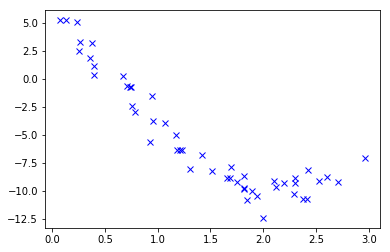

In [13]:
# generate sample with error
x = 3 * np.random.rand(50) # between 0 and 3
e = 1 * np.random.randn(x.size) # noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*np.cos(x+1) + e;  plt.plot(x,y,'bx');

array([ 2.71849848, -5.6998836 ])

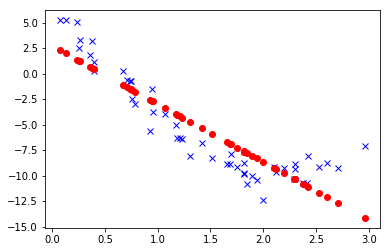

In [18]:
# linear model f(x) = b0 + b1 x
X = np.ones((x.size,2));
X[:,1] = x

Xpinv = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
bHat = np.dot(Xpinv,y)
yHat = np.dot(X,bHat)

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro'); bHat

array([ 2.71849848, -5.6998836 ])

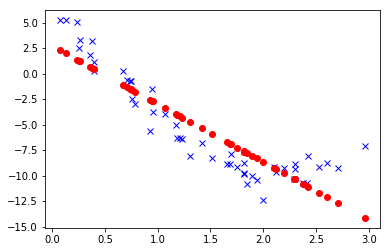

In [20]:
# same using methods
Xpinv = np.linalg.inv(X.T.dot(X)).dot(X.T)
bHat = Xpinv.dot(y)
yHat = X.dot(bHat)

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro'); bHat

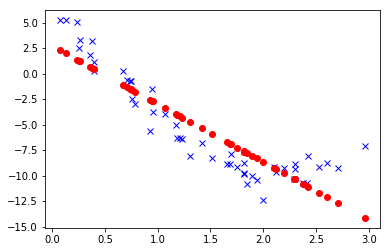

In [23]:
# same again with pinv() and the Hat matrix
H = X.dot(np.linalg.pinv(X)) 
yHat = H.dot(y)

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro');

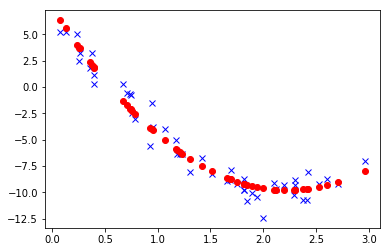

In [24]:
# linear model f(x) = b0 + b1 x + b2 * x^2
X = np.ones((x.size,3));
X[:,1] = x # partials with respect to b1
X[:,2] = x*x # with respect to b2

# sames as before
bHatQ = np.linalg.pinv(X).dot(y)
yHatQ = X.dot(bHatQ)

# or like this
H = np.dot(X,np.linalg.pinv(X))
yHatQ = np.dot(H,y)

plt.plot(x,y,'bx'); plt.plot(x,yHatQ,'ro');

### Exercise

0. Fit to the same data the function $f(x;\beta_0,\beta_1) = \beta_0\sin(x) + \beta_1\cos(x)$

0. Evaluate the best fit on a grid of $x$ values in $[-1, 4]$

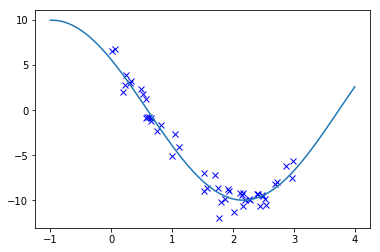

In [28]:
# exercise
x = 3 * np.random.rand(50) # between 0 and 3
e = 1 * np.random.randn(x.size) # noise
y = 10*np.cos(x+1) + e;  
plt.plot(x,y,'bx');

X= np.ones((x.size,2))
X[:,0]= np.sin(x)
X[:,1]= np.cos(x)

xx = np.linspace(-1,4,100)
XX= np.ones((xx.size,2))
XX[:,0]= np.sin(xx)
XX[:,1]= np.cos(xx)

bhat = np.linalg.pinv(X).dot(y)
yhat = XX.dot(bhat)

plt.plot(xx,yhat)
plt.show()


## Excercise


0. Fit a 3rd order polynomial to the same data

0. Evaluate on a grid of 1000 equally-spaced points in $[-1,4]$

0. Plot the best (sin+cos) and (3rd order) results over each other

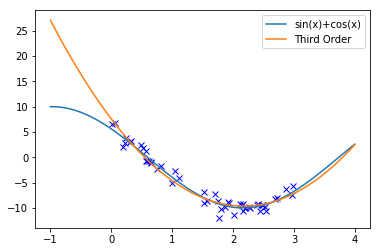

In [29]:
X3 = np.ones((x.size,3))
X3[:,1] = x**1
X3[:,2] = x**2

# Evaluate on a grid of 1000 equally-spaced points in [−1,4]
xx3 = np.linspace(-1,4,1000)
XX3 = np.ones((xx3.size,3))
XX3[:,1] = xx3**1
XX3[:,2] = xx3**2

bhat3 = np.linalg.pinv(X3).dot(y)
yhat3 = XX3.dot(bhat3)

# Plot the best (sin+cos) and 3rd order result
plt.plot(x,y,'bx');
plt.plot(xx,yhat,label='sin(x)+cos(x)')
plt.plot(xx3,yhat3,label='Third Order')
plt.legend();
plt.show();


### Heteroscedastic error

- Simple modification

>$\displaystyle C = \sum_{i=1}^N w_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$


> yields

>$\displaystyle \sum_i w_i \left\{ y_i - \sum_{k} X_{ik} \hat\beta_k\ \right\}\, X_{il}  = 0$


>$\displaystyle \sum_i  X_{il} w_i y_i = \sum_k \left(\sum_i X_{il} w_i X_{ik}\right) \hat{\beta}_k$


- Diagonal weight matrix $W$

>$\displaystyle X^T W y = X^T W X \hat{\beta} $

>$\displaystyle \hat\beta = (X^T W X)^{-1} X^T W y $


### Problem with Linear Regression (Over-fit)

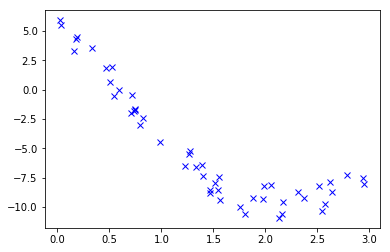

In [30]:
# generate sample with error
x = 3 * np.random.rand(50) # between 0 and 3
e = 1 * np.random.randn(x.size) # noise
y = 10*np.cos(x+1) + e;  
plt.plot(x,y,'bx');

#### Fit and predict using linear regression with different order of polynomials

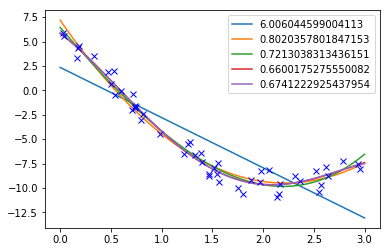

In [31]:
def ser(x, n):
    X = np.ones( (x.size, n+1) )
    for i in range(1, n+1):
        #X[:,i] = np.sin(i * x)
        X[:,i] = x**i
    return X    

xx = np.linspace(0, 3, 100) 

for n in range(1,6):
    X = ser(x, n)  
    b = np.linalg.pinv(X).dot(y)
    mse = sum(np.square(y-X.dot(b)))/(x.size-b.size)
    yhat = ser(xx,n).dot(b) 
    plt.plot(xx, yhat, label=mse);  
    
plt.plot(x,y,'bx');  
plt.legend();
plt.show();

### Problem with Linear Regression (Outliers)

#### Generate Outliers

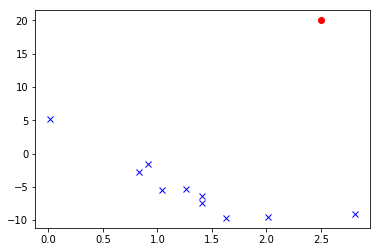

In [32]:
# Add an outlier (2.5, 20) to the original dataset
x = 3 * np.random.rand(10) # between 0 and 3
e = 1 * np.random.randn(x.size) # noise
y = 10*np.cos(x+1) + e;  
plt.plot(x,y,'bx');
xold = x;
yold = y;
x = np.hstack((x,2.5))
y = np.hstack((y,20))
plt.plot(2.5,20,'ro');

#### Fit the new dataset (with outliers)

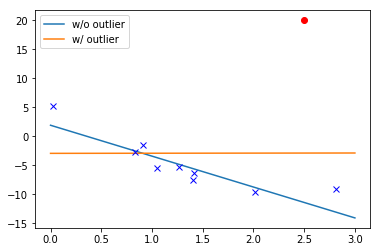

In [33]:
def ser(x):
    X = np.ones( (x.size, 2) )
    X[:,1] = x
    return X    

xx = np.linspace(0, 3, 100) 

X = ser(xold)  
b = np.linalg.pinv(X).dot(yold)
yhat = ser(xx).dot(b) 
plt.plot(xx, yhat, label='w/o outlier'); 

X = ser(x)  
b = np.linalg.pinv(X).dot(y)
yhat = ser(xx).dot(b) 
plt.plot(xx, yhat, label='w/ outlier');  
    
plt.plot(x[:9],y[:9],'bx');
plt.plot(2.5,20,'ro');
plt.legend();
plt.show();